In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from word2number import w2n

In [2]:
df=pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [9]:
for i in range(len(df)):
    if pd.isna(df.at[i, 'experience']):
        df.at[i, 'experience'] = 'zero'
    elif isinstance(df.at[i, 'experience'], str):  
        df.at[i, 'experience'] = w2n.word_to_num(df.at[i, 'experience'])
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [10]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [12]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


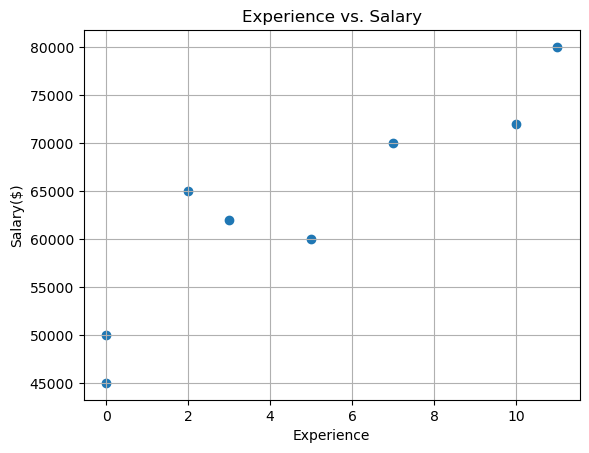

In [22]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])


plt.scatter(df['experience'], df['salary($)'])
plt.xlabel('Experience')
plt.ylabel('Salary($)')
plt.title('Experience vs. Salary')
plt.grid(True)
plt.show()


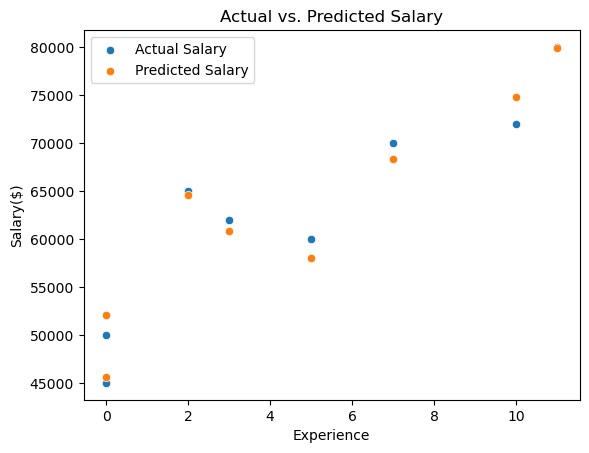

In [23]:

predicted_salary = reg.predict(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']])


df_with_predictions = df.copy()
df_with_predictions['predicted_salary'] = predicted_salary


sns.scatterplot(x='experience', y='salary($)', data=df_with_predictions, label='Actual Salary')
sns.scatterplot(x='experience', y='predicted_salary', data=df_with_predictions, label='Predicted Salary')
plt.xlabel('Experience')
plt.ylabel('Salary($)')
plt.title('Actual vs. Predicted Salary')
plt.legend()
plt.show()


In [21]:
reg.predict([[2,9,6]])

C:\Users\adham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [24]:
reg.predict([[18,9,7]])

C:\Users\adham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([102617.65357794])

In [ ]:
reg.predict([[12,10,10]])